In [4]:
%%bash

wget http://www2.informatik.uni-freiburg.de/~cziegler/BX/BX-CSV-Dump.zip

--2020-06-20 17:13:38--  http://www2.informatik.uni-freiburg.de/~cziegler/BX/BX-CSV-Dump.zip
Risoluzione di www2.informatik.uni-freiburg.de (www2.informatik.uni-freiburg.de)... 132.230.105.133
Connessione a www2.informatik.uni-freiburg.de (www2.informatik.uni-freiburg.de)|132.230.105.133|:80... connesso.
Richiesta HTTP inviata, in attesa di risposta... 200 OK
Lunghezza: 26085508 (25M) [application/zip]
Salvataggio in: "BX-CSV-Dump.zip"

     0K .......... .......... .......... .......... ..........  0%  586K 43s
    50K .......... .......... .......... .......... ..........  0% 2,29M 27s
   100K .......... .......... .......... .......... ..........  0% 3,67M 20s
   150K .......... .......... .......... .......... ..........  0% 3,79M 17s
   200K .......... .......... .......... .......... ..........  0% 2,51M 15s
   250K .......... .......... .......... .......... ..........  1% 5,13M 14s
   300K .......... .......... .......... .......... ..........  1% 1,56M 14s
   350K .......... .

In [8]:
%%bash

unzip BX-CSV-Dump.zip

Archive:  BX-CSV-Dump.zip
  inflating: BX-Book-Ratings.csv     
  inflating: BX-Books.csv            
  inflating: BX-Users.csv            


In [10]:
%%bash
mkdir data
mv *.csv data/.

In [12]:
ls data

BX-Book-Ratings.csv  BX-Books.csv         BX-Users.csv


In [163]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import os

%config InlineBackend.figure_format = 'retina'

In [164]:
for _,_,files in os.walk('data/.'):
    break

In [165]:
files

['BX-Book-Ratings.csv', 'BX-Books.csv', 'BX-Users.csv']

In [166]:
Ratings=pd.read_csv('data/'+files[0],sep=';', encoding='ISO-8859–1')
Users=pd.read_csv('data/'+files[2],sep=';', encoding='ISO-8859–1')

In [167]:
names=["ISBN","Book-Title","Book-Author","Year-Of-Publication","Publisher","Image-URL-S","Image-URL-M","Image-URL-L","rep"]

In [168]:
Books=pd.read_csv('data/'+files[1],delimiter=";",encoding='ISO-8859–1',names=names,skiprows=1)

/usr/local/Cellar/jupyterlab/2.1.1/libexec/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (3,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [169]:
Books[Books.rep.notnull()].head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,rep
6450,0735201994,Peterman Rides Again: Adventures Continue with...,"the Catalog Business""",John Peterman,2000,Prentice Hall Art,http://images.amazon.com/images/P/0735201994.0...,http://images.amazon.com/images/P/0735201994.0...,http://images.amazon.com/images/P/0735201994.0...
43665,0330482750,"Three Novels: \A Strange and Sublime Address\""","\""Afternoon Raag\""","\""Freedom Song\""""",Amit Chaudhuri,2001,Pan Macmillan,http://images.amazon.com/images/P/0330482750.0...,http://images.amazon.com/images/P/0330482750.0...
51749,0413326608,"Upon my word!: More stories from \My word!\"" a...","Tony Shryane""",Frank Muir,1974,Eyre Methuen,http://images.amazon.com/images/P/0413326608.0...,http://images.amazon.com/images/P/0413326608.0...,http://images.amazon.com/images/P/0413326608.0...
92036,0440500702,Schrodinger's Cat Trilogy : \The Universe Next...,"\""The Homing Pigeons\""""",ROBERT A. WILSON,1988,Dell,http://images.amazon.com/images/P/0440500702.0...,http://images.amazon.com/images/P/0440500702.0...,http://images.amazon.com/images/P/0440500702.0...
104317,0373166982,"Please Say \I Do\"" (Three Weddings &amp","A Hurricane) (Harlequin American Romance, No ...",Karen T. Whittenburg,1997,Harlequin,http://images.amazon.com/images/P/0373166982.0...,http://images.amazon.com/images/P/0373166982.0...,http://images.amazon.com/images/P/0373166982.0...


In [170]:
Users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [171]:
Users.columns=Users.columns.str.strip().str.lower().str.replace('-','_')

In [172]:
Users.columns.values

array(['user_id', 'location', 'age'], dtype=object)

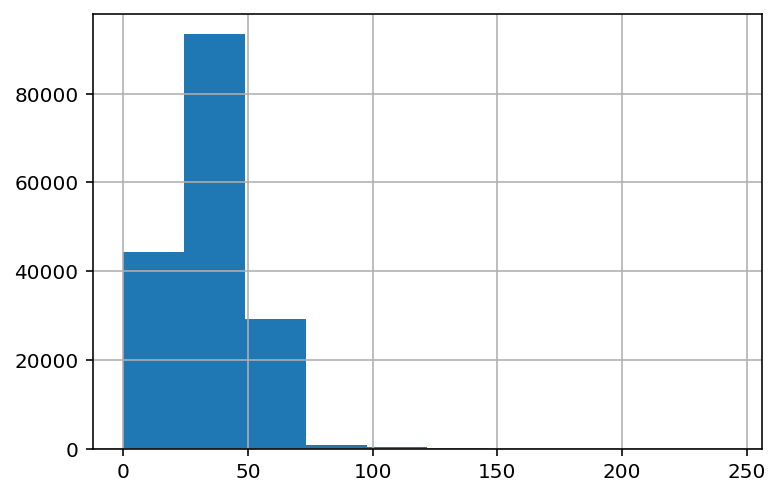

In [173]:
Users.age.hist()

In [174]:
(Users.age>100).sum()

366

In [175]:
(Users.age<3).sum()

809

In [176]:
Users.age[(Users.age<3) | (Users.age>100)]=np.nan

<ipython-input-176-801bb41aa87c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Users.age[(Users.age<3) | (Users.age>100)]=np.nan


In [177]:
(Users.age>100).sum()

0

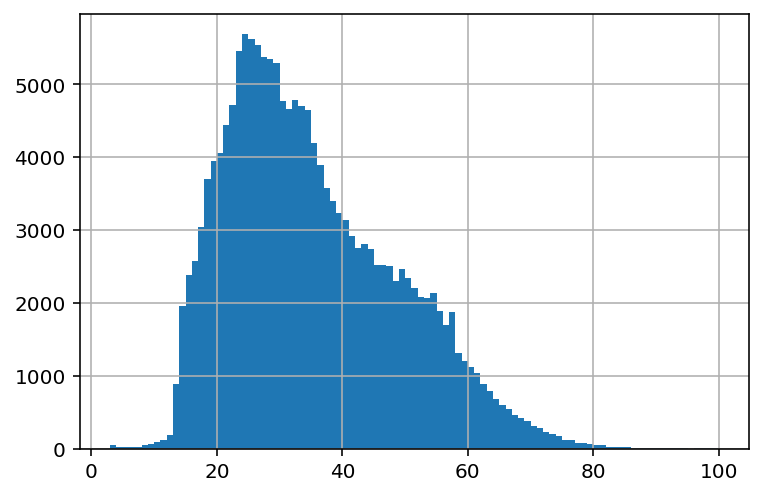

In [178]:
Users.age.hist(bins=97)

In [179]:
Users_loc=Users.location.str.strip().str.lower().str.split(',',2,expand=True)

In [180]:
Users.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [181]:
Users_loc.columns=['city','state','country']

In [182]:
Users=Users.join(Users_loc)

In [183]:
Users.drop(columns=['location'],inplace=True)


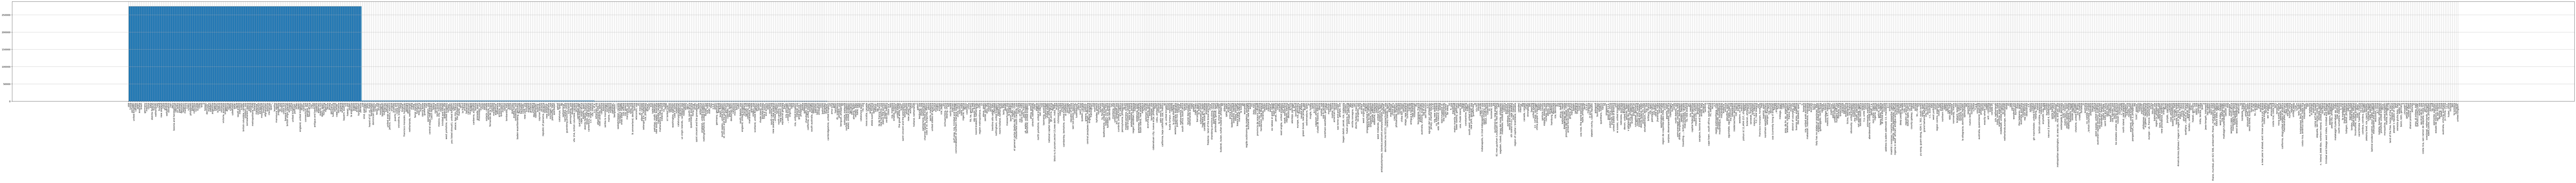

In [184]:
plt.figure(figsize=(200,8))
plt.xticks(rotation=90)
Users.country.hist()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

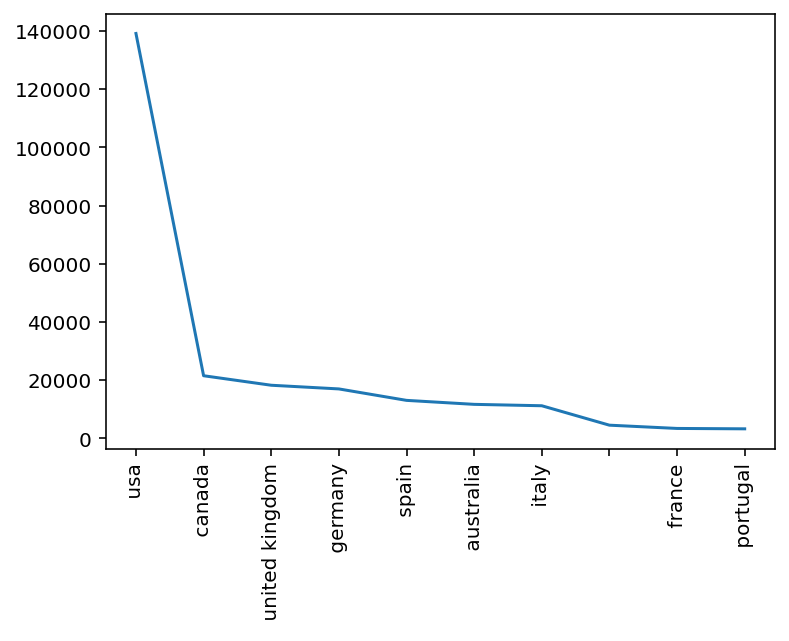

In [185]:
plt.plot(Users.country.value_counts()[:10])

plt.xticks(rotation=90)

In [188]:
for name in Users.country.unique()[:9]:
    print(name=='')

False
False
False
False
False
False
False
False
True


In [189]:
Users.country.replace('',np.nan,inplace=True)

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

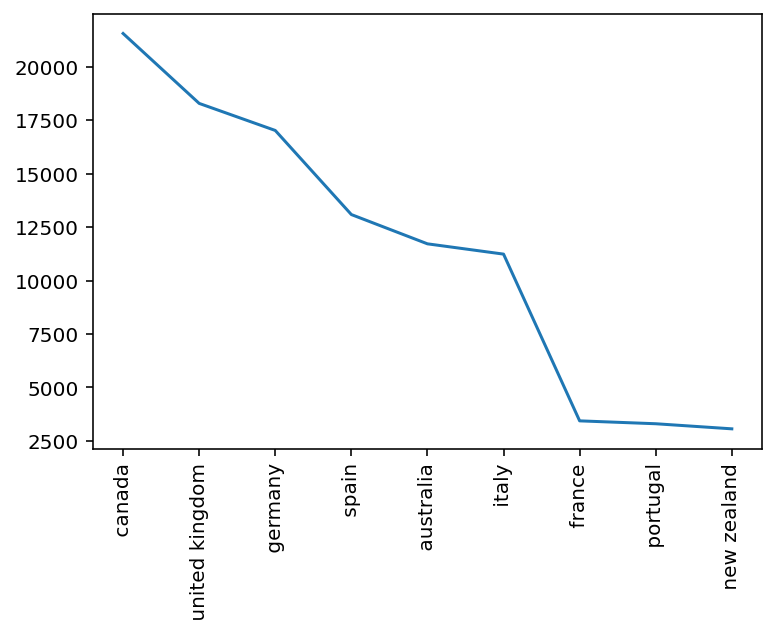

In [194]:
plt.plot(Users.country.value_counts()[1:10])
plt.xticks(rotation=90)

In [196]:
Books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,rep
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,NaN
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,NaN
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,NaN
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,NaN
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,NaN


In [199]:
Books.columns=Books.columns.str.strip().str.lower().str.replace('-','_')

In [201]:
Books.book_title

0                                       Classical Mythology
1                                              Clara Callan
2                                      Decision in Normandy
3         Flu: The Story of the Great Influenza Pandemic...
4                                    The Mummies of Urumchi
                                ...                        
271374                           There's a Bat in Bunk Five
271375                              From One to One Hundred
271376    Lily Dale : The True Story of the Town that Ta...
271377                          Republic (World's Classics)
271378    A Guided Tour of Rene Descartes' Meditations o...
Name: book_title, Length: 271379, dtype: object

In [208]:
Books.drop(columns=["image_url_s","image_url_m","image_url_l","rep"],inplace=True)

In [209]:
Books

,isbn,book_title,book_author,year_of_publication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271374,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271375,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271377,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [210]:
Books.dtypes

isbn                   object
book_title             object
book_author            object
year_of_publication    object
publisher              object
dtype: object

In [213]:
Books.year_of_publication=pd.to_numeric(Books.year_of_publication,errors='coerce')

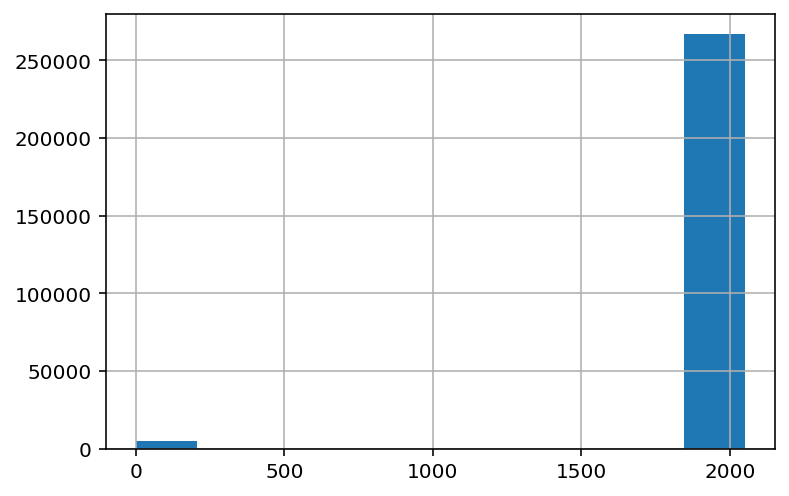

In [218]:
Books.year_of_publication.hist()

In [220]:
Books.year_of_publication.replace(0,np.nan,inplace=True)

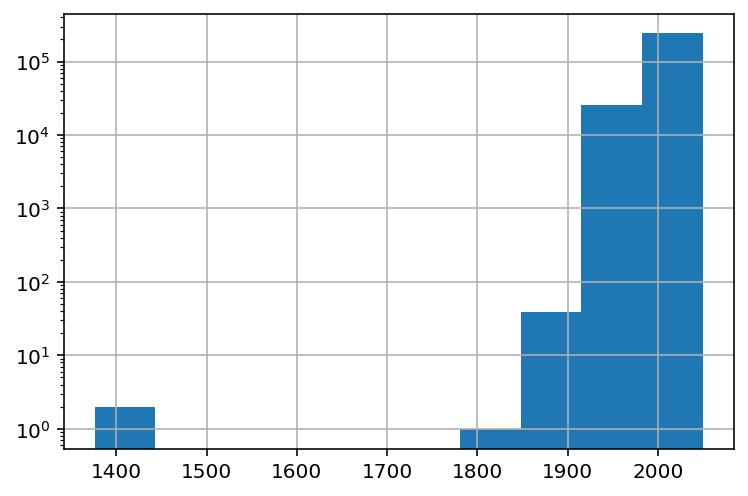

In [222]:
Books.year_of_publication.hist()
plt.yscale('log')

In [231]:
years=(Books.year_of_publication.value_counts().sort_index())
years=years.where(years>10)

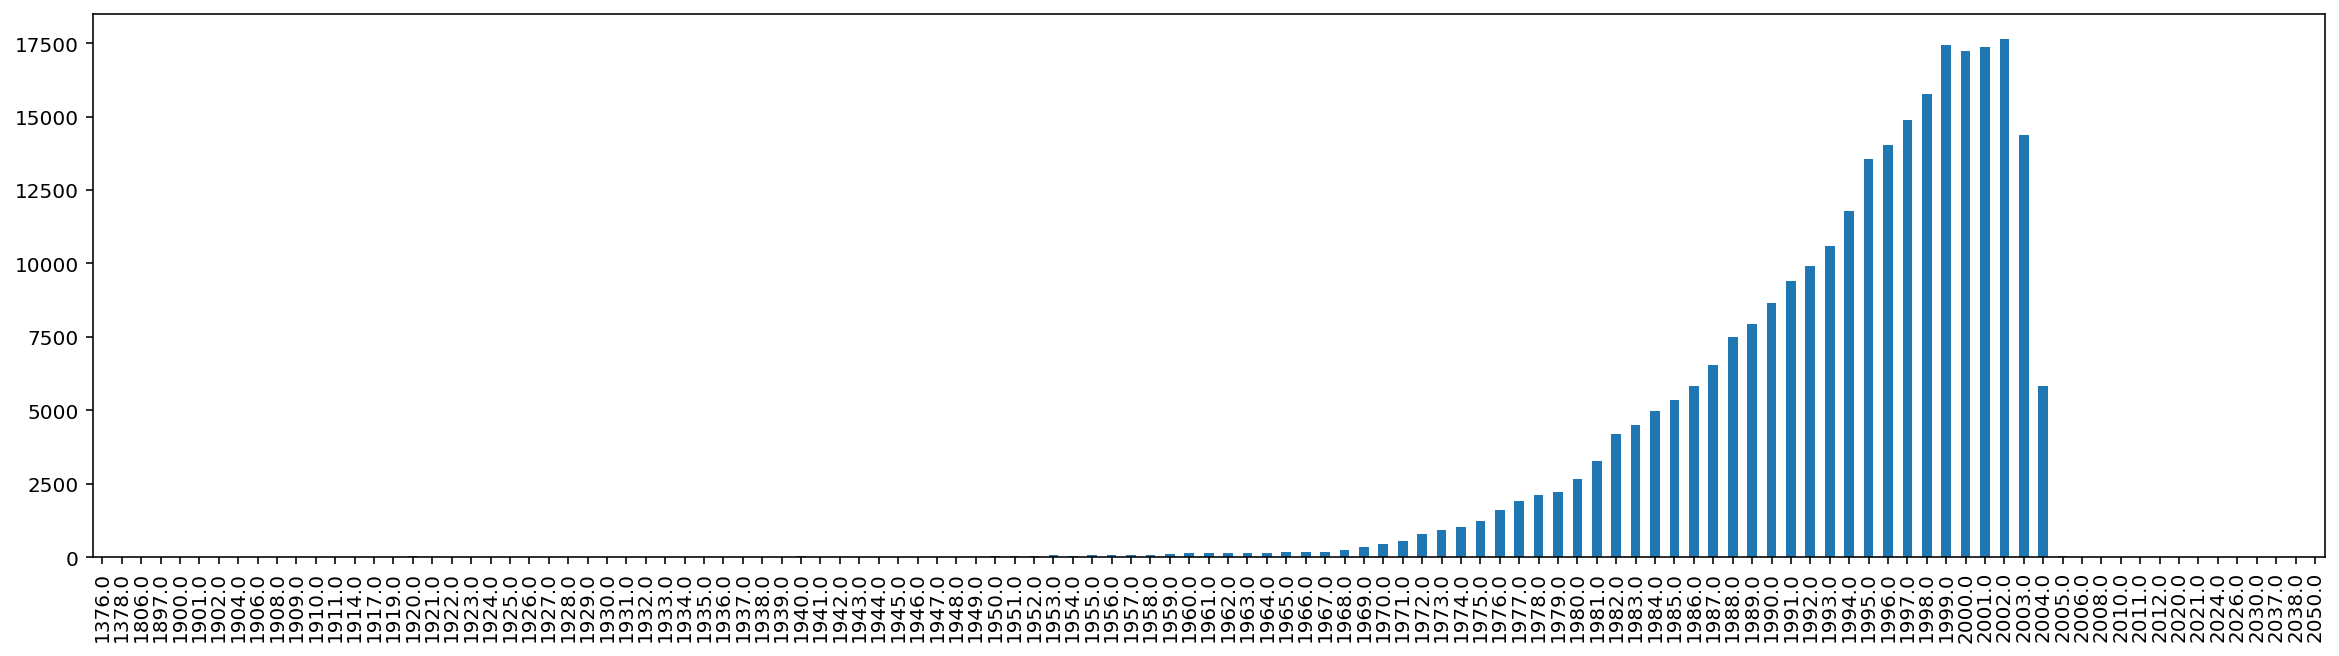

In [236]:
plt.figure(figsize=(20,5))
years.plot(kind='bar')

In [237]:
Books[Books.year_of_publication>2020]

,isbn,book_title,book_author,year_of_publication,publisher
37488,0671746103,MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEA...,Coville,2030.0,Aladdin
55679,0671791990,MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY ...,Bruce Coville,2030.0,Aladdin
78171,0870449842,Crossing America,National Geographic Society,2030.0,National Geographic
80267,0140301690,Alice's Adventures in Wonderland and Through t...,Lewis Carroll,2050.0,Puffin Books
97830,0140201092,Outline of European Architecture (Pelican S.),Nikolaus Pevsner,2050.0,Penguin USA
116058,0394701658,Three Plays of Eugene Oneill,Eugene O'Neill,2038.0,Vintage Books USA
118299,3442436893,Das groÃ?Â?e BÃ?Â¶se- MÃ?Â¤dchen- Lesebuch.,Kathy Lette,2026.0,Goldmann
183779,0590085417,Heidi,Johanna Spyri,2021.0,Scholastic
193004,0870446924,"Field Guide to the Birds of North America, 3rd...",National Geographic Society,2030.0,National Geographic
228187,0671266500,FOREST PEOPLE (Touchstone Books (Hardcover)),Colin M. Turnbull,2030.0,Simon &amp; Schuster


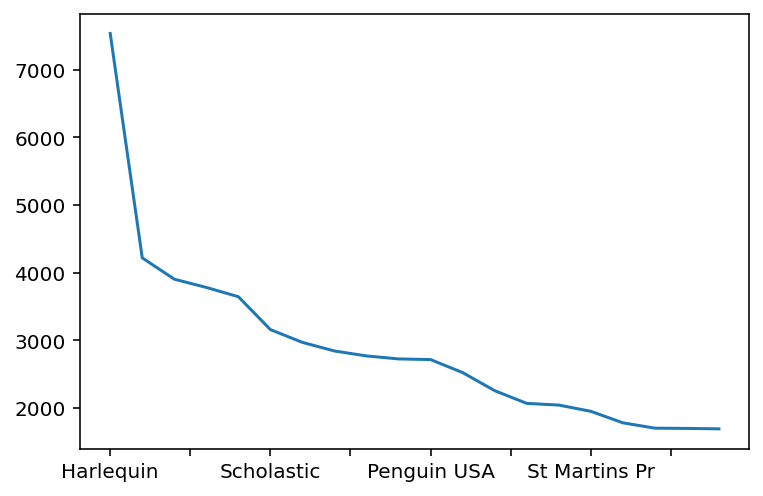

In [239]:
Books.publisher.value_counts()[:20].plot()

In [244]:
Books.book_title.value_counts()

Selected Poems                                                                                       27
Little Women                                                                                         24
Wuthering Heights                                                                                    21
Adventures of Huckleberry Finn                                                                       20
The Secret Garden                                                                                    20
                                                                                                     ..
Giving It Some Thought: Cases for Early Childhood Practice (Naeyc (Series), #150.)                    1
The Last Word the New York Times Book of Obituaries and Farewells: A Celebration of Unusual Lives     1
In the Midnight Rain                                                                                  1
Unforgettable Bride (Virgin Brides) (Silhouette Romance , No 129

In [247]:
Books[Books.book_title=='Little Women']

,isbn,book_title,book_author,year_of_publication,publisher
3952,185854176X,Little Women,Louisa M. Atcott,1995.0,Brimax Books Ltd
4330,0861782356,Little Women,Louisa May Alcott,NaN,Octopus Publising Group Plc
12228,0590203509,Little Women,Louisa May Alcott,1994.0,Scholastic
20677,0440447682,Little Women,Louisa May Alcott,1990.0,Yearling Books
32838,1550134140,Little Women,Louisa May Alcott,NaN,Firefly Books Ltd
52213,0451529308,Little Women,Louisa May Alcott,2004.0,Signet Classics
52554,0451518144,Little Women,Louisa May Alcott,1983.0,Signet Book
53361,0590437976,Little Women,Louisa May Alcott,1992.0,Scholastic
57435,0195813898,Little Women,Alcott,1985.0,Oxford University Press
72171,0785788727,Little Women,Louisa May Alcott,1999.0,Sagebrush Bound


In [250]:
Ratings.columns=Ratings.columns.str.strip().str.lower().str.replace('-','_')

In [254]:
Ratings.user_id.value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
158698        1
17920         1
277135        1
275086        1
187812        1
Name: user_id, Length: 105283, dtype: int64

In [256]:
Ratings[Ratings.user_id==11676]

,user_id,isbn,book_rating
45326,11676,9022906116,7
45327,11676,"\0432534220\""""",6
45328,11676,"\2842053052\""""",7
45329,11676,0 7336 1053 6,0
45330,11676,0=965044153,7
...,...,...,...
58923,11676,O77O428452,0
58924,11676,O805063196,0
58925,11676,O9088446X,8
58926,11676,X000000000,10


In [267]:
groups=Ratings.groupby('isbn')

In [268]:
groups.mean()

,user_id,book_rating
isbn,,
0330299891,135504.5,3.0
0375404120,178028.5,1.5
0586045007,89192.0,0.0
9022906116,50434.0,3.5
9032803328,89192.0,0.0
...,...,...
cn113107,107301.0,0.0
ooo7156103,266146.0,7.0
§423350229,85250.0,0.0


In [266]:
groups.get_group(11676)

,user_id,isbn,book_rating
45326,11676,9022906116,7
45327,11676,"\0432534220\""""",6
45328,11676,"\2842053052\""""",7
45329,11676,0 7336 1053 6,0
45330,11676,0=965044153,7
...,...,...,...
58923,11676,O77O428452,0
58924,11676,O805063196,0
58925,11676,O9088446X,8
58926,11676,X000000000,10


In [272]:
(Ratings).shape

(1149780, 3)

In [273]:
Books.shape

(271379, 5)

In [274]:
Books_wR=Ratings.join(Books.set_index('isbn'),on='isbn')

In [275]:
Books_wR

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press
...,...,...,...,...,...,...,...
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000.0,Longstreet Press
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997.0,Alfred A. Knopf
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996.0,Jove Books
1149778,276721,0590442449,10,Fourth Grade Rats,Jerry Spinelli,1996.0,Scholastic


In [276]:
Books_wR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   user_id              1149780 non-null  int64  
 1   isbn                 1149780 non-null  object 
 2   book_rating          1149780 non-null  int64  
 3   book_title           1031175 non-null  object 
 4   book_author          1031174 non-null  object 
 5   year_of_publication  1017123 non-null  float64
 6   publisher            1031173 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 61.4+ MB


In [278]:
group=Books_wR.groupby('book_title')

In [282]:
values_sum=group.book_rating.sum()
values_mean=group.book_rating.mean()

In [297]:
values_mean.sort_values(inplace=True,ascending=False)

In [298]:
values_mean

book_title
Angels and Bolters: Women's Cancer Scripts                                                                         10.0
The Teddy Bear Sourcebook: For Collectors and Artists                                                              10.0
The Palm at the End of the Mind: Selected Poems and a Play                                                         10.0
The Perfect Brew: A Presentation of Coffees and Teas                                                               10.0
The folk-lore of the Isle of Man: Being an account of its myths, legends, superstitions, customs &amp; proverbs    10.0
                                                                                                                   ... 
Busybody Nora                                                                                                       0.0
Busy! Busy! Busy!                                                                                                   0.0
Busy Trains (Random House Pic

(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 <a list of 7 Text major ticklabel objects>)

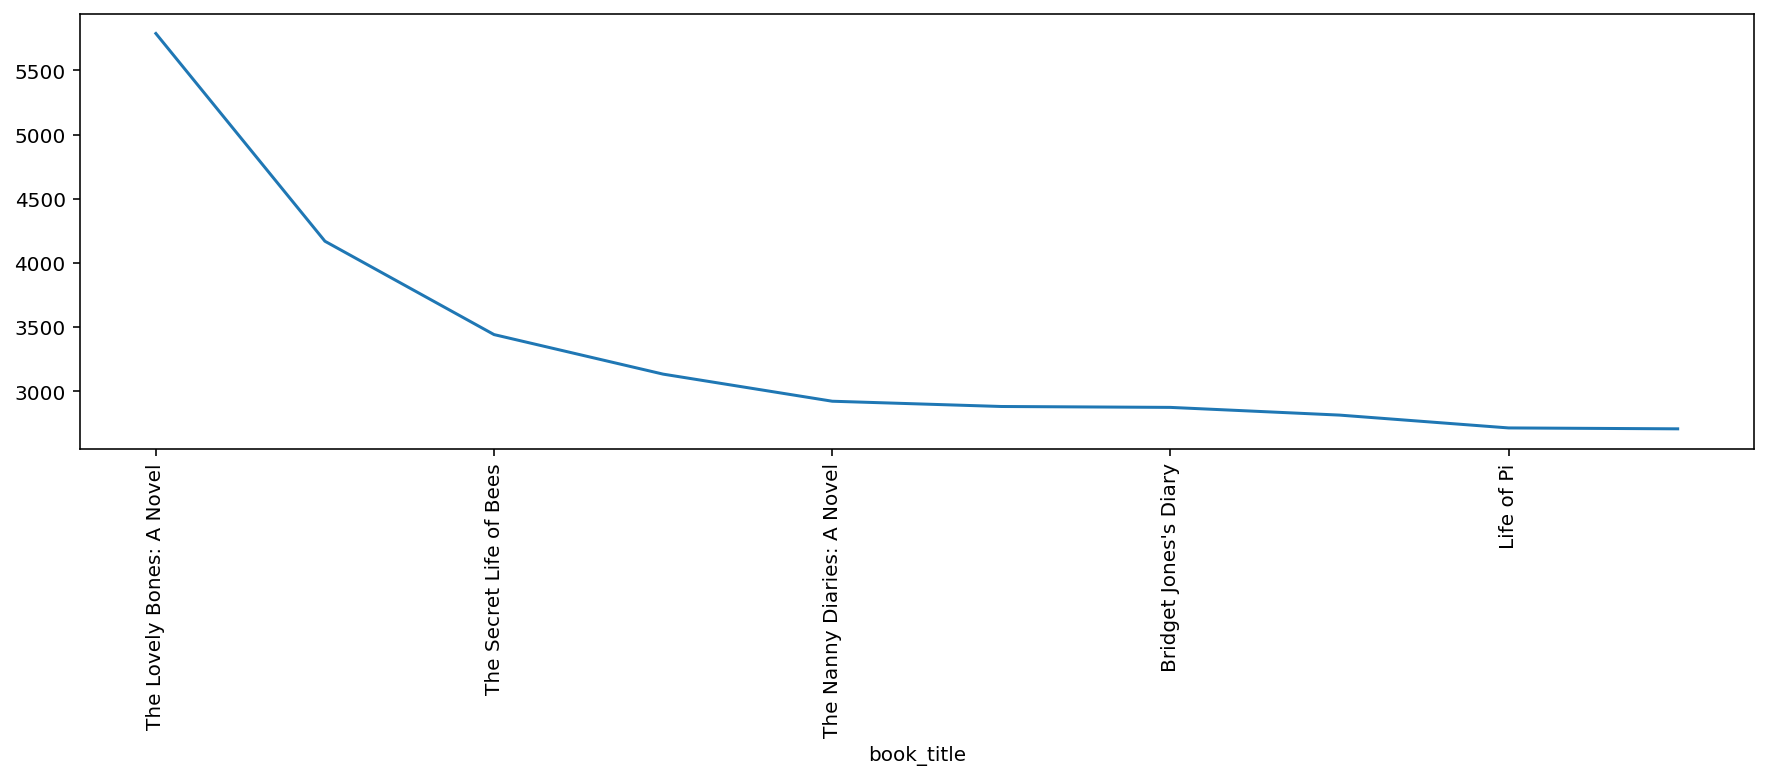

In [301]:
plt.figure(figsize=(15,4))
values_sum[:10].plot()
plt.xticks(rotation=90)